# Conway's Game of Life $\hspace{4mm} <4$ $kyu>$
https://www.codewars.com/kata/52423db9add6f6fc39000354

__Current CodeWars level:__

    Overall:4 kyu / 2.3%
    Python:5 kyu / 81.9%
    SQL:6 kyu / 16.3%

Given a 2D array and a number of generations, compute n timesteps of Conway's Game of Life.

The rules of the game are:

1. Any live cell with fewer than two live neighbours dies, as if caused by underpopulation.
2. Any live cell with more than three live neighbours dies, as if by overcrowding.
3. Any live cell with two or three live neighbours lives on to the next generation.
4. Any dead cell with exactly three live neighbours becomes a live cell.

Each cell's neighborhood is the 8 cells immediately around it (i.e. Moore Neighborhood). The universe is infinite in both the x and y dimensions and all cells are initially dead - except for those specified in the arguments. The return value should be a 2d array cropped around all of the living cells. (If there are no living cells, then return [[]].)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def get_generation(cells, generations):

    def universe_action(univ, contract=False, expand=False, N='input', plot=True): 
        
        if contract:
            # Remove rows and columns with only zeros
            i_NOT_0, j_NOT_0 = (univ != 0).nonzero()
            
            univ = univ[min(i_NOT_0) : max(i_NOT_0) + 1, 
                        min(j_NOT_0) : max(j_NOT_0) + 1]
        
        if expand:
            # proxy for 'The universe is infinite'
            univ = np.pad(univ, pad_width=1)
            
        if plot:
            sns.heatmap(univ, cmap='viridis', annot=True)
            plt.title(f'Cells: generation {N}')
            plt.show()

        return univ

   
    def neighbours(i, j, matrix):
        M = matrix[max(0, i - 1):i + 2, max(0, j - 1):j + 2]

        if matrix[i, j]:
            return M.sum() - 1  # Don't count cell_ij
        else:
            return M.sum()
    
    
    cells_in = universe_action(np.array(cells),
                               expand=True)
    cells_out = cells_in.copy()
    
        
    for generation in range(1, generations + 1):
        # 1. Find neighbours of each cell ------------------------------
        for i, row in enumerate(cells_in):
            for j, alive in enumerate(row):
                neighbour_count = neighbours(i, j, cells_in)

                # 2. Apply Conway's rules ------------------------------
                if alive:
                    if neighbour_count in [2, 3]:  
                        # Rule 3: Survive
                        pass  
                    else:
                        # Rule 1: Underpopulation 
                        # Rule 2: Overcrowding
                        cells_out[i, j] = 0

                elif not alive and (neighbour_count == 3):
                    # Rule 4: New cell
                    cells_out[i, j] = 1
        
        if cells_out.sum():
            cells_out = universe_action(cells_out,
                                        contract=True, 
                                        expand=True,
                                        N=generation) 
        else:
            return [[]]
        
        
        # 3. Need to continue? ------------------------------------
        if np.array_equal(cells_in, cells_out):
            # Population didn't change
            break
        else:
            # Set 'cells_out' as input for the next generation
            cells_in = cells_out.copy()
            
    cells_out = universe_action(cells_out,
                                contract=True,
                                N='output') 
    

    return cells_out.tolist()



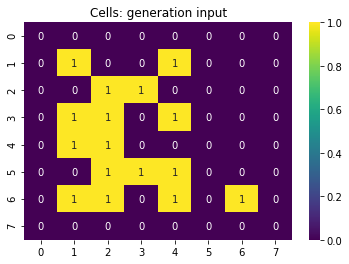

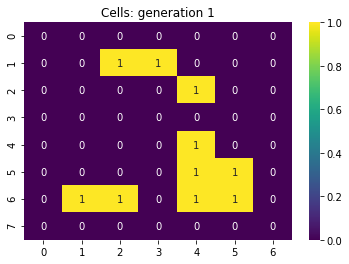

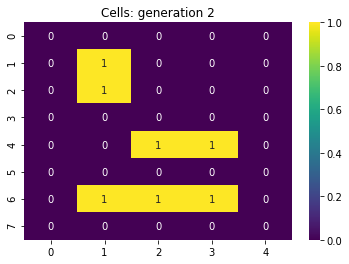

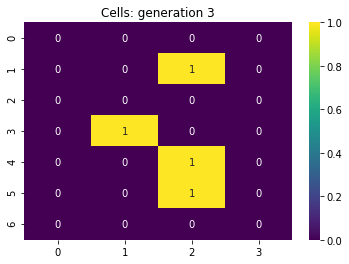

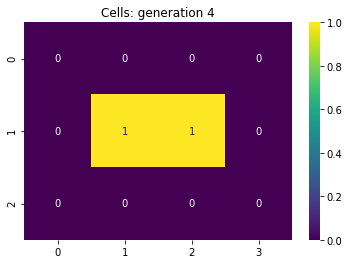

[[]]

In [12]:
get_generation(
    cells=[[1, 0, 0, 1, 0, 0],
           [0, 1, 1, 0, 0, 0],
           [1, 1, 0, 1, 0, 0],
           [1, 1, 0, 0, 0, 0],
           [0, 1, 1, 1, 0, 0],
           [1, 1, 0, 1, 0, 1]],
    
    generations=10
)

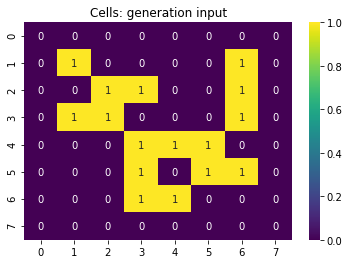

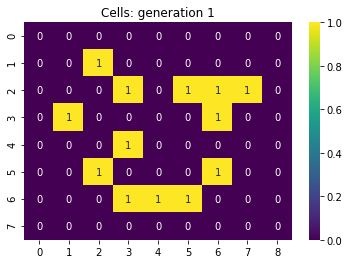

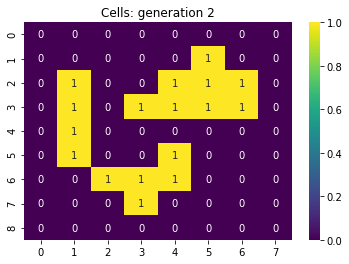

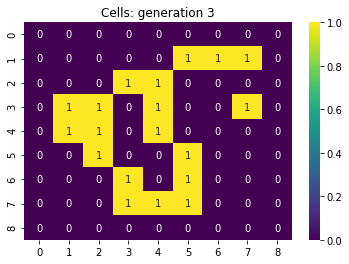

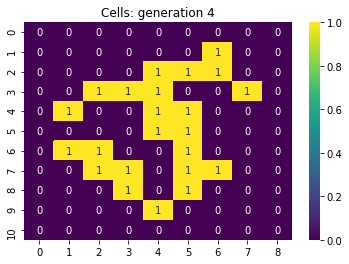

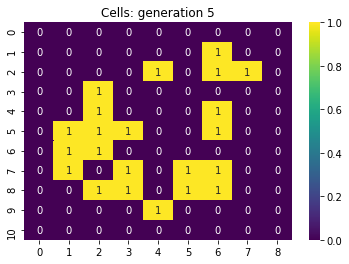

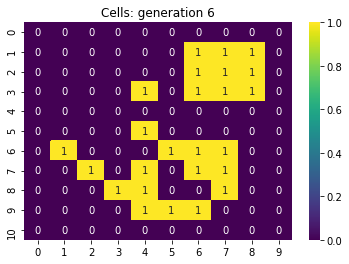

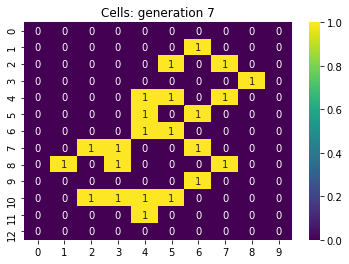

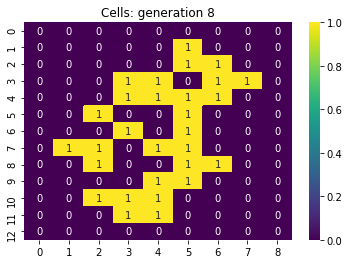

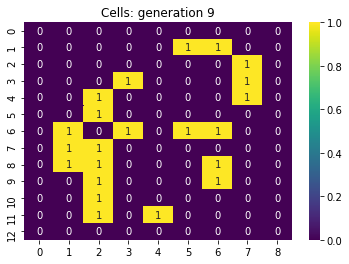

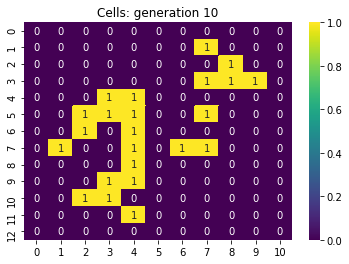

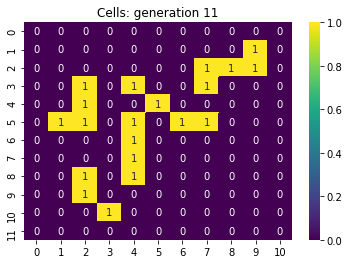

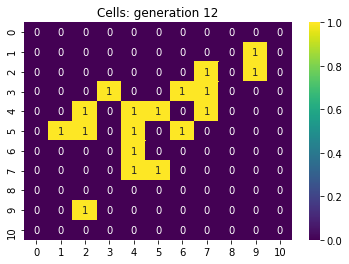

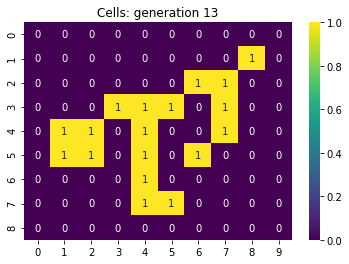

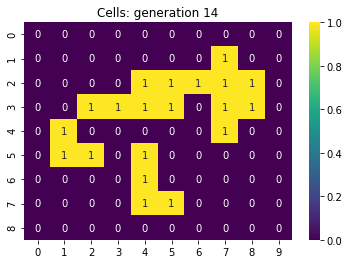

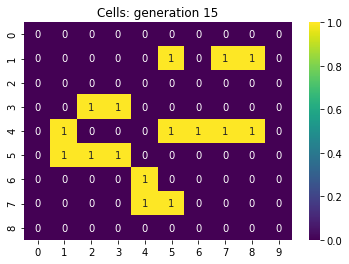

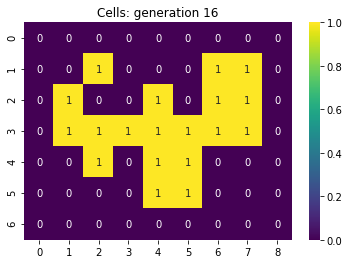

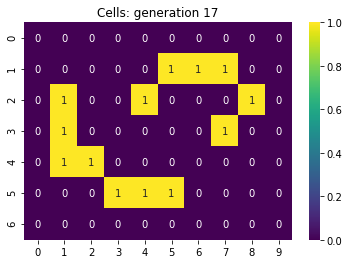

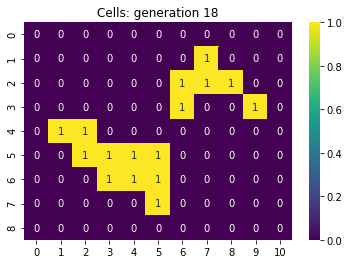

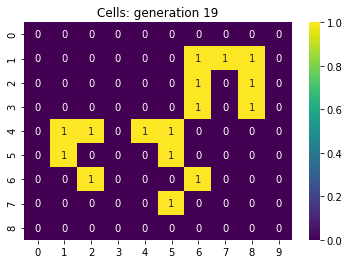

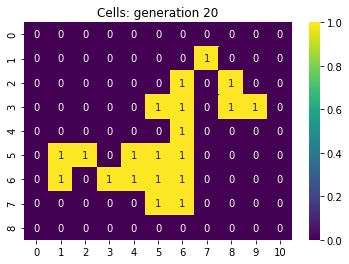

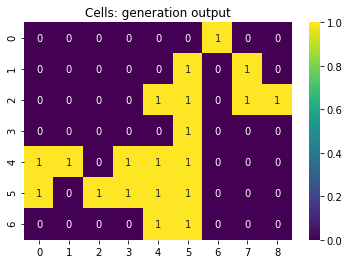

[[0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 1, 1, 0, 1, 1],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [1, 1, 0, 1, 1, 1, 0, 0, 0],
 [1, 0, 1, 1, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 1, 0, 0, 0]]

In [13]:
get_generation(
    cells=[[1, 0, 0, 0, 0, 1],
           [0, 1, 1, 0, 0, 1],
           [1, 1, 0, 0, 0, 1],
           [0, 0, 1, 1, 1, 0],
           [0, 0, 1, 0, 1, 1],
           [0, 0, 1, 1, 0, 0]],
    
    generations=20
)